# 1. Define the problem

## How can educational institutions leverage predictive analytics to identify at-risk students early in their academic journey, thereby reducing dropout rates and enhancing overall student success.


# 2. Find the Data

## This dataset is publicably available in UCI Machine Learning repository. Link is below: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success 

# 3. Read the Dataset

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler

In [2]:
data = pd.read_csv("Predict Students Dropout.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

# 4. Exploratory Data Analysis

## Dataset Overview

In [4]:
data.shape

(4424, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
pd.set_option('display.max_columns', None)
data.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,18.669,1.728,8856.643,0.891,4.578,132.613,1.873,19.562,22.275,10.961,11.032,126.978,0.548,0.012,0.114,0.881,0.352,0.248,23.265,0.025,0.710,6.271,8.299,4.707,10.641,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,17.485,1.314,2063.566,0.312,10.217,13.188,6.915,15.603,15.343,26.418,25.263,14.482,0.498,0.107,0.317,0.324,0.478,0.432,7.588,0.156,2.361,2.480,4.179,3.094,4.844,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,33.000,0.000,1.000,95.000,1.000,1.000,1.000,0.000,0.000,95.000,0.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,9085.000,1.000,1.000,125.000,1.000,2.000,3.000,4.000,4.000,117.900,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,5.000,6.000,3.000,11.000,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,17.000,1.000,9238.000,1.000,1.000,133.100,1.000,19.000,19.000,5.000,7.000,126.100,1.000,0.000,0.000,1.000,0.000,0.000,20.000,0.000,0.000,6.000,8.000,5.000,12.286,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,39.000,2.000,9556.000,1.000,1.000,140.000,1.000,37.000,37.000,9.000,9.000,134.800,1.000,0.000,0.000,1.000,1.000,0.000,25.000,0.000,0.000,7.000,10.000,6.000,13.400,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,57.000,9.000,9991.000,1.000,43.000,190.000,109.000,44.000,44.000,194.000,195.000,190.000,1.000,1.000,1.000,1.000,1.000,1.000,70.000,1.000,20.000,26.000,45.000,26.000,18.875,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [7]:
# check total null values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
# check if values duplicated
data.duplicated().sum()

np.int64(0)

In [9]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

## Target Distribution

C:\Users\Suresh\AppData\Local\Temp\ipykernel_15604\877777065.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=["Graduate", "Dropout", "Enrolled"], y=data_pie.values, palette="bright")


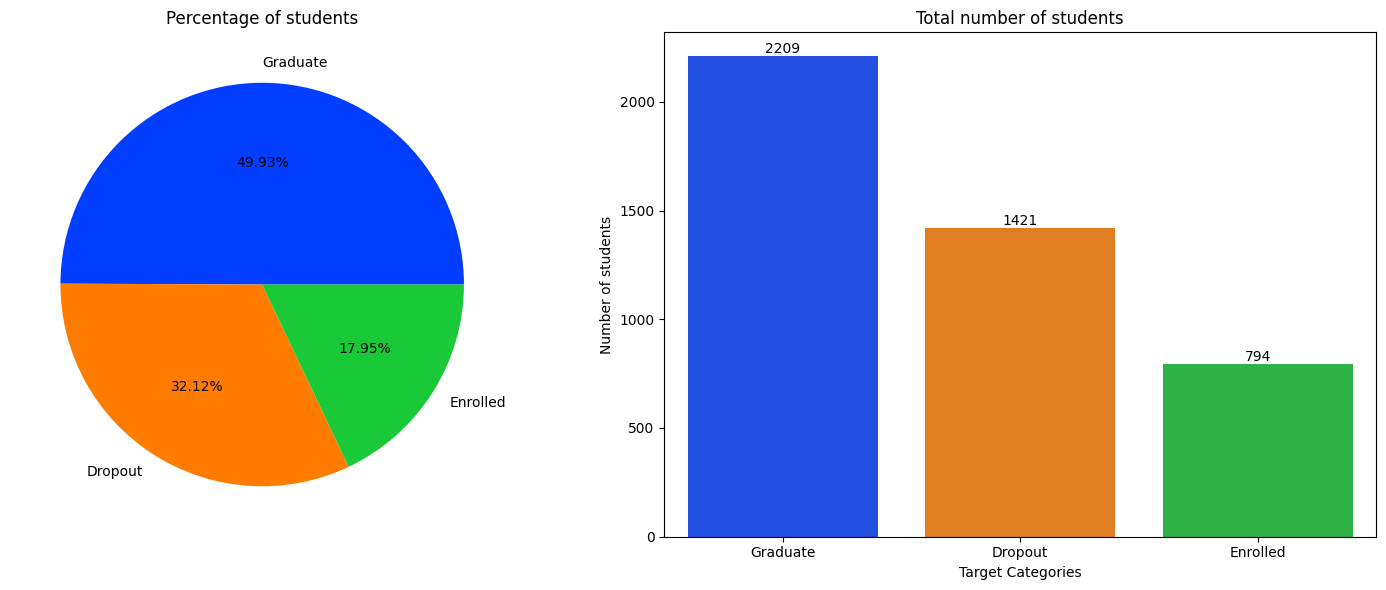

In [10]:
data_pie = data['Target'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
ax1.pie(data_pie, autopct="%.2f%%", labels=["Graduate", "Dropout", "Enrolled"], colors=sns.color_palette('bright'))
ax1.set_title('Percentage of students')

# Bar plot without hue, just use palette directly
ax2 = sns.barplot(x=["Graduate", "Dropout", "Enrolled"], y=data_pie.values, palette="bright")
ax2.set(xlabel='Target Categories', ylabel='Number of students')
ax2.set_title('Total number of students')

# Add labels to each bar in the bar plot
for bar, label in zip(ax2.patches, data_pie.values):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate of the label (center of the bar)
        bar.get_height(),  # Y coordinate (height of the bar)
        int(label),  # The label (number of students)
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()




In [11]:
# Replace 'Enrolled' with 'Graduate' since Enrolled students will soon be graduating
data['Target'] = data['Target'].replace('Enrolled', 'Graduate')

In [12]:
data['Target'].value_counts()

Target
Graduate    3003
Dropout     1421
Name: count, dtype: int64

## Gender

C:\Users\Suresh\AppData\Local\Temp\ipykernel_15604\3339229740.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_gender_labels, y=data_gender.values, palette="bright", ax=ax2)


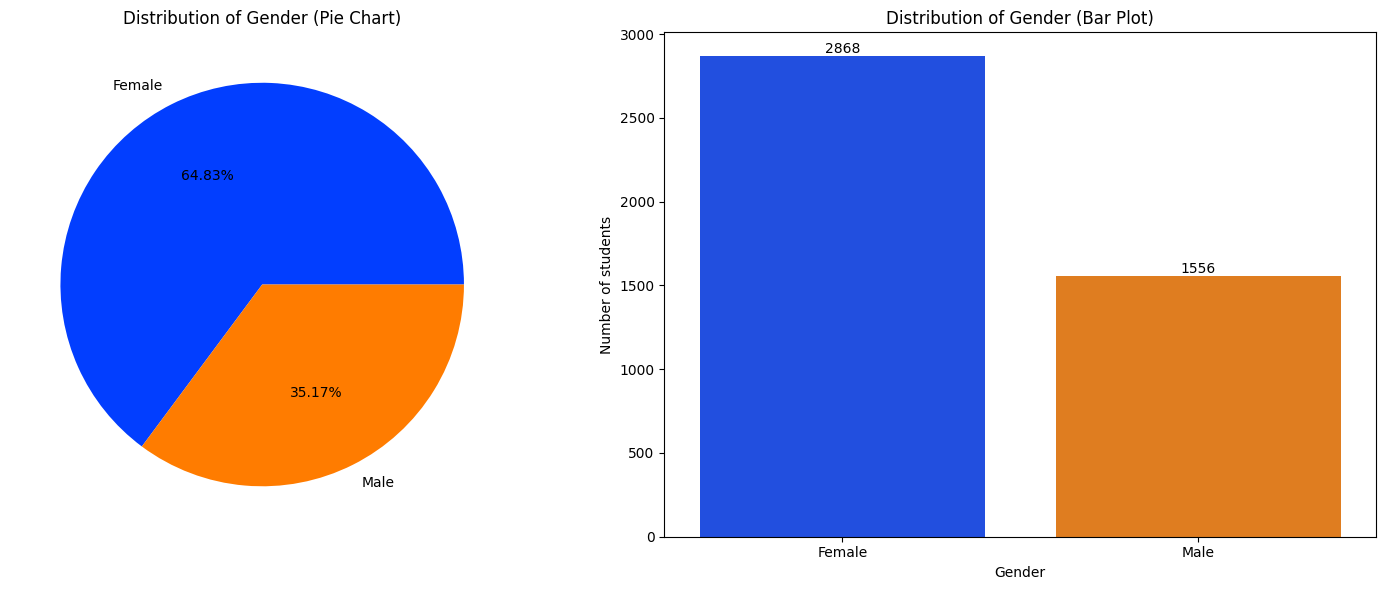

In [13]:
# Gender data
data_gender = data['Gender'].value_counts()

# Mapping gender codes to labels
gender_mapping = {0: 'Female', 1: 'Male'}
data_gender_labels = data_gender.index.map(gender_mapping)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for gender distribution
ax1.pie(data_gender, labels=data_gender_labels, autopct="%.2f%%", colors=sns.color_palette('bright'))
ax1.set_title('Distribution of Gender (Pie Chart)')

# Bar plot for gender distribution
sns.barplot(x=data_gender_labels, y=data_gender.values, palette="bright", ax=ax2)
ax2.set(xlabel='Gender', ylabel='Number of students')
ax2.set_title('Distribution of Gender (Bar Plot)')

# Manually add labels to each bar
for bar, label in zip(ax2.patches, data_gender.values):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate (center of the bar)
        bar.get_height(),  # Y coordinate (height of the bar)
        int(label),  # The label (number of students)
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


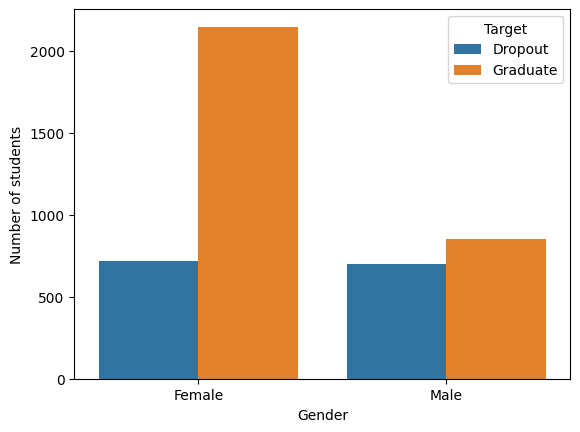

In [14]:
sns.countplot(data=data, x='Gender', hue='Target', order=[0, 1], hue_order=['Dropout', 'Graduate'])
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.ylabel('Number of students')
plt.show()

## Relationship status

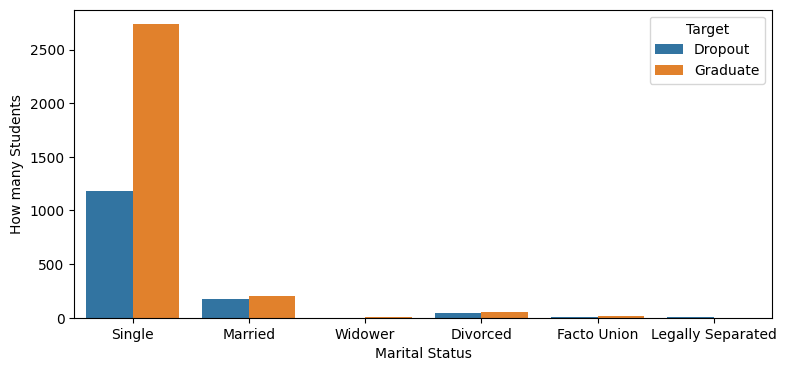

In [15]:
plt.figure(figsize=(9, 4))

sns.countplot(data=data, x='Marital status', hue='Target')

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'])
plt.xlabel('Marital Status')
plt.ylabel('How many Students')

target_labels = ['Dropout', 'Graduate']
plt.legend(title='Target', labels=target_labels)

plt.show()

## Scholarship

In [16]:
data['Scholarship holder'].value_counts()

Scholarship holder
0    3325
1    1099
Name: count, dtype: int64

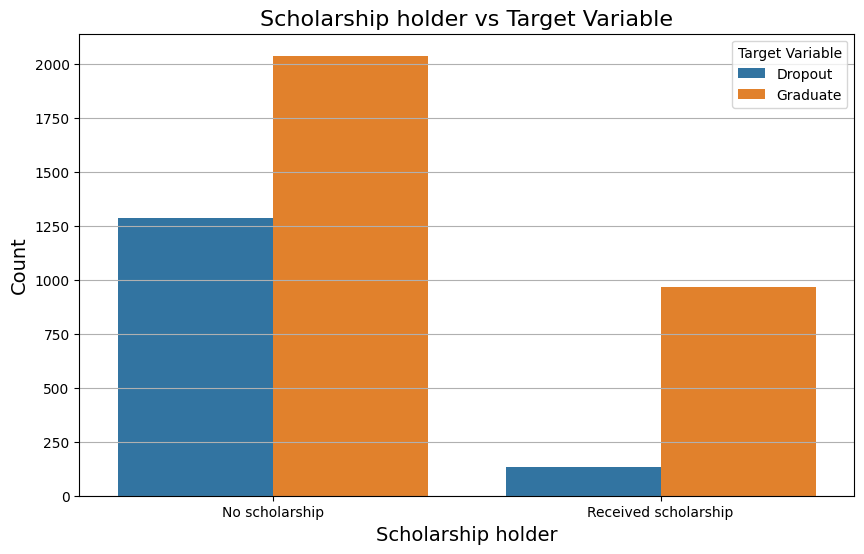

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Scholarship holder', hue='Target', data=data)  
plt.title('Scholarship holder vs Target Variable', fontsize=16)
plt.xlabel('Scholarship holder', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No scholarship', 'Received scholarship'])
plt.legend(title='Target Variable')
plt.grid(axis='y')

## Attendance type

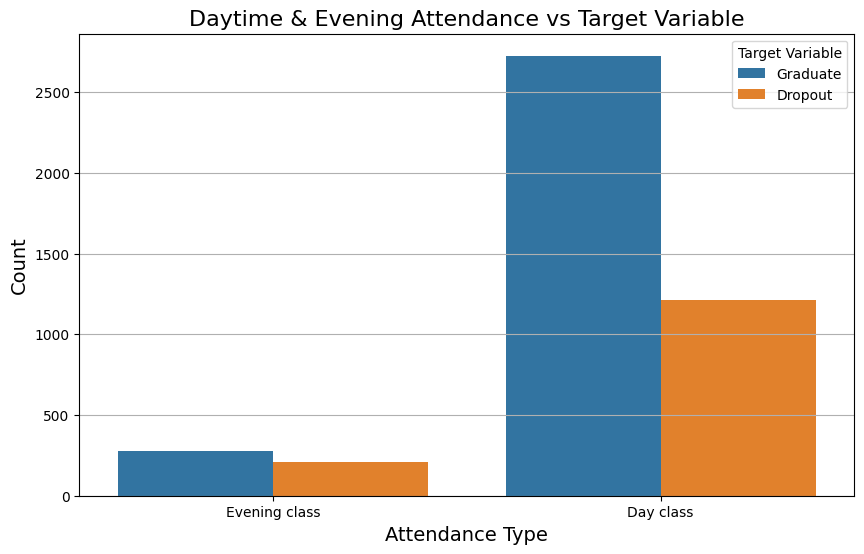

In [18]:
# Create a count plot for Daytime/Evening Attendance vs Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Daytime/evening attendance\t', hue='Target', data=data)  
plt.title('Daytime & Evening Attendance vs Target Variable', fontsize=16)
plt.xlabel('Attendance Type', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Evening class', 'Day class'])
plt.ylabel('Count', fontsize=14)
plt.legend(title='Target Variable')
plt.grid(axis='y')

## Tuition fees up to date

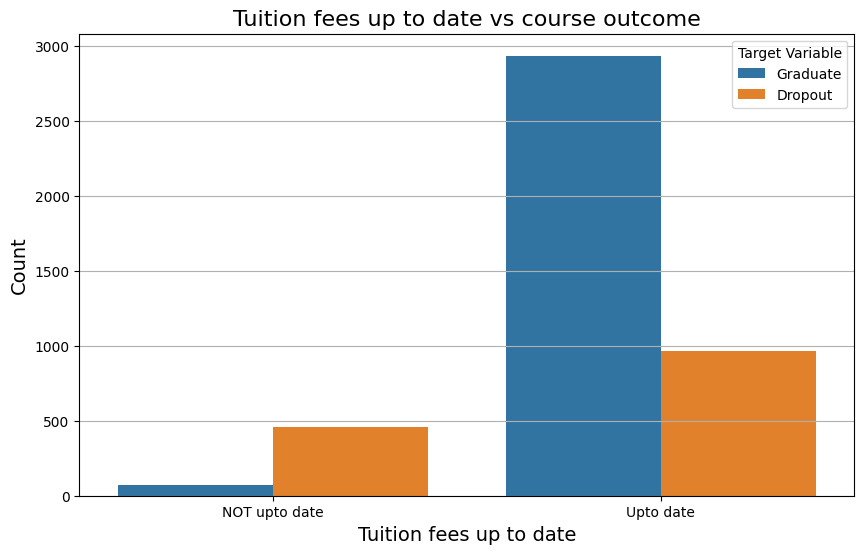

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Tuition fees up to date', hue='Target', data=data)  
plt.title('Tuition fees up to date vs course outcome', fontsize=16)
plt.xlabel('Tuition fees up to date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['NOT upto date', 'Upto date'])
plt.legend(title='Target Variable')
plt.grid(axis='y')

## Dropout rates by course

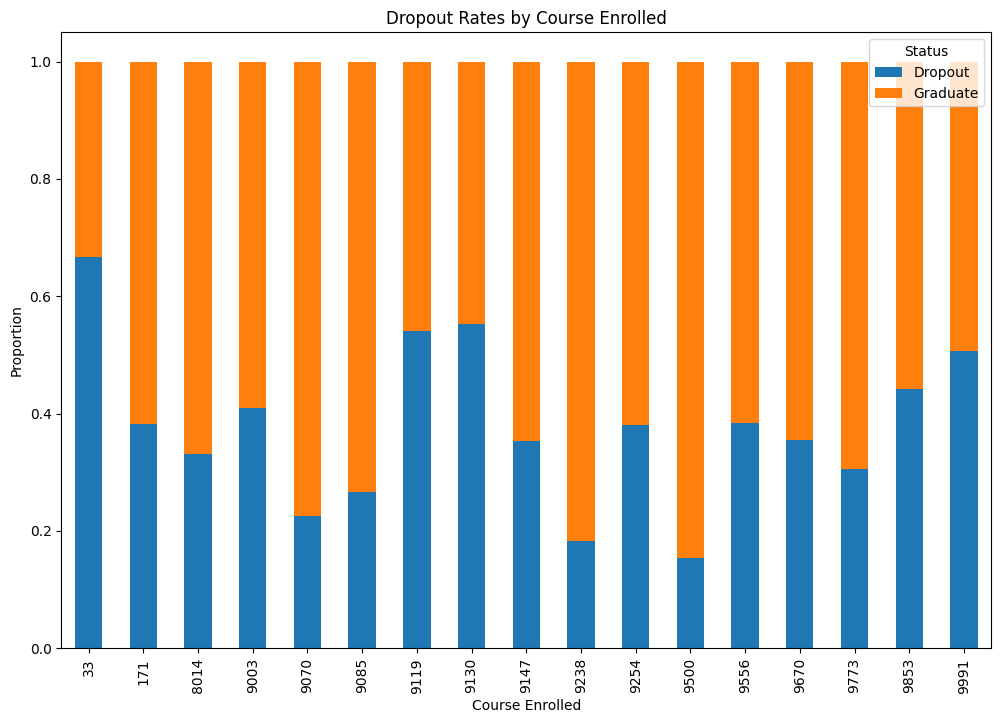

In [20]:
# Dropout rates by course enrolled
dropout_rates = data.groupby('Course')['Target'].value_counts(normalize=True).unstack()
dropout_rates.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Dropout Rates by Course Enrolled')
plt.xlabel('Course Enrolled')
plt.ylabel('Proportion')
plt.legend(title='Status', loc='upper right')
plt.show()

## Mother's qualification impact on course outcome

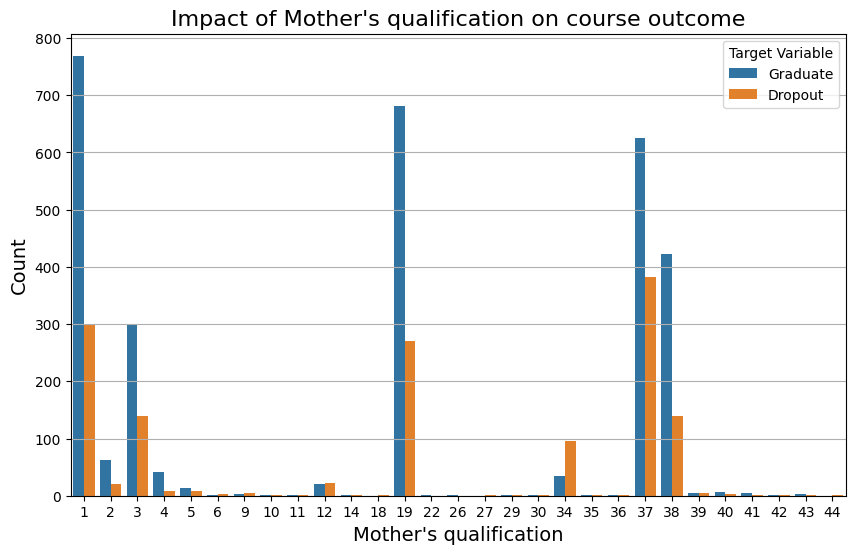

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Mother\'s qualification', hue='Target', data=data)  
plt.title('Impact of Mother\'s qualification on course outcome', fontsize=16)
plt.xlabel('Mother\'s qualification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Target Variable')
plt.grid(axis='y')

## Father's qualification impact on course outcome

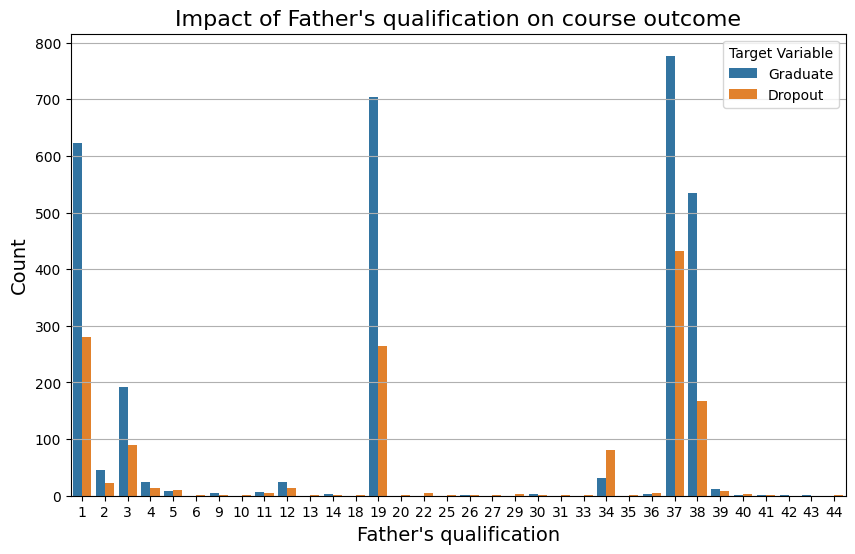

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Father\'s qualification', hue='Target', data=data)  
plt.title('Impact of Father\'s qualification on course outcome', fontsize=16)
plt.xlabel('Father\'s qualification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Target Variable')
plt.grid(axis='y')

## Top 10 Mother's occupation Vs course outcome

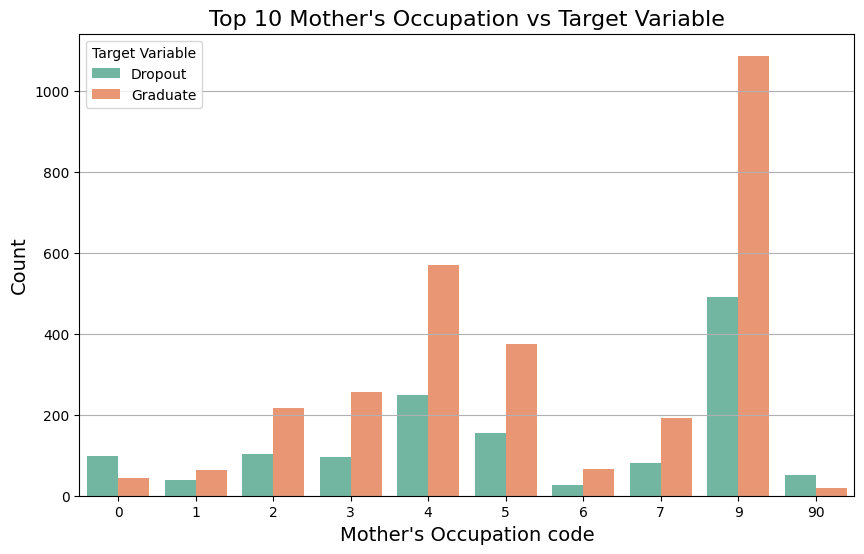

In [23]:
# Calculate counts of each occupation
top_occupations = data['Mother\'s occupation'].value_counts().nlargest(10).index

# Filter the data for only top 10 occupations
filtered_data = data[data['Mother\'s occupation'].isin(top_occupations)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Mother\'s occupation', hue='Target', data=filtered_data, palette='Set2')
plt.title('Top 10 Mother\'s Occupation vs Target Variable', fontsize=16)
plt.xlabel('Mother\'s Occupation code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Target Variable')
plt.grid(axis='y')
plt.show()

## Father's occupation Vs course outcome

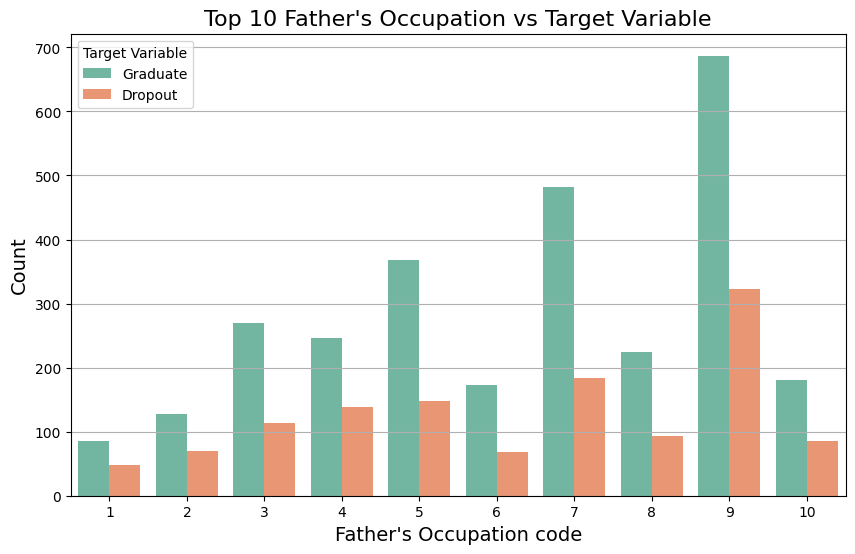

In [24]:
# Calculate counts of each occupation
fat_top_occupations = data['Father\'s occupation'].value_counts().nlargest(10).index

# Filter the data for only top 10 occupations
fat_filtered_data = data[data['Father\'s occupation'].isin(fat_top_occupations)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Father\'s occupation', hue='Target', data=fat_filtered_data, palette='Set2')
plt.title('Top 10 Father\'s Occupation vs Target Variable', fontsize=16)
plt.xlabel('Father\'s Occupation code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Target Variable')
plt.grid(axis='y')
plt.show()

# 5. Prepare the Data

In [25]:
# create a dataframe for dropout students for future analysics
dropout_data = data[data['Target'] == 'Dropout']  # Filter for Dropouts
gender_counts = dropout_data['Gender'].value_counts()  # Count occurrences of each gender
print(gender_counts)

Gender
0    720
1    701
Name: count, dtype: int64


In [26]:
# Replace 'Enrolled' with 'Graduate' since Enrolled students will soon be graduating
data['Target'] = data['Target'].replace('Enrolled', 'Graduate')

In [27]:
# Replace 'Graduate' with '1' & 'Dropout' with '0' for Binary classification.
data['Target'] = data['Target'].replace('Graduate', '1')
data['Target'] = data['Target'].replace('Dropout', '0')

# 6. Modelling

## By looking at the dataset and analysing problem statement, this is a 'Binary classification model'.

# 7. Split the Data

In [28]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [29]:
X = data.drop('Target', axis=1)
# X = data[['Tuition fees up to date','Age at enrollment','Admission grade','Previous qualification (grade)','Course']]
# X = data[['Tuition fees up to date','Course']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (3539, 36)
X_test :  (885, 36)
y_train :  (3539,)
y_test :  (885,)


# 8. Define and Fit models

In [30]:
# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [31]:
# Fit and resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

In [32]:
# Create a new DataFrame to see the results
resampled_data = pd.DataFrame(X_resampled)
resampled_data['Target'] = y_resampled

print("Original class distribution:")
print(y.value_counts())

print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
Target
1    3003
0    1421
Name: count, dtype: int64

Resampled class distribution:
Target
0    3003
1    3003
Name: count, dtype: int64


In [33]:
X = resampled_data.drop('Target', axis=1)
y = resampled_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (4804, 36)
X_test :  (1202, 36)
y_train :  (4804,)
y_test :  (1202,)


In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
               'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}
           
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [36]:
scores=[]
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.882804,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
1,random_forest,0.926102,"{'max_depth': 30, 'n_estimators': 200}"
2,logistic_regression,0.853660,{'C': 5}
3,naive_bayes_gaussian,0.794127,{}
4,decision_tree,0.876766,{'criterion': 'entropy'}


# 9. Verify and Evaluate the Training Model

Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1-score: 0.92


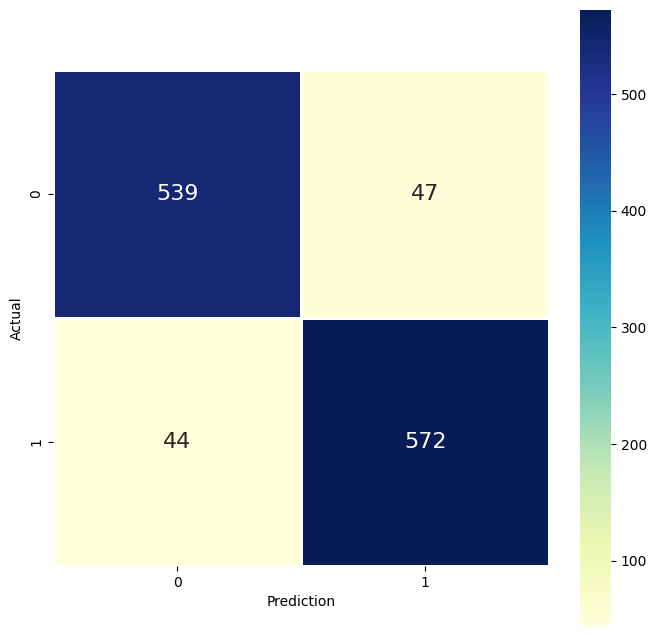

In [37]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

In [42]:
print(cm)

[[539  47]
 [ 44 572]]


In [38]:
import joblib

# Save the model
joblib.dump(best_rf, "best_random_forest_model.pkl")

['best_random_forest_model.pkl']

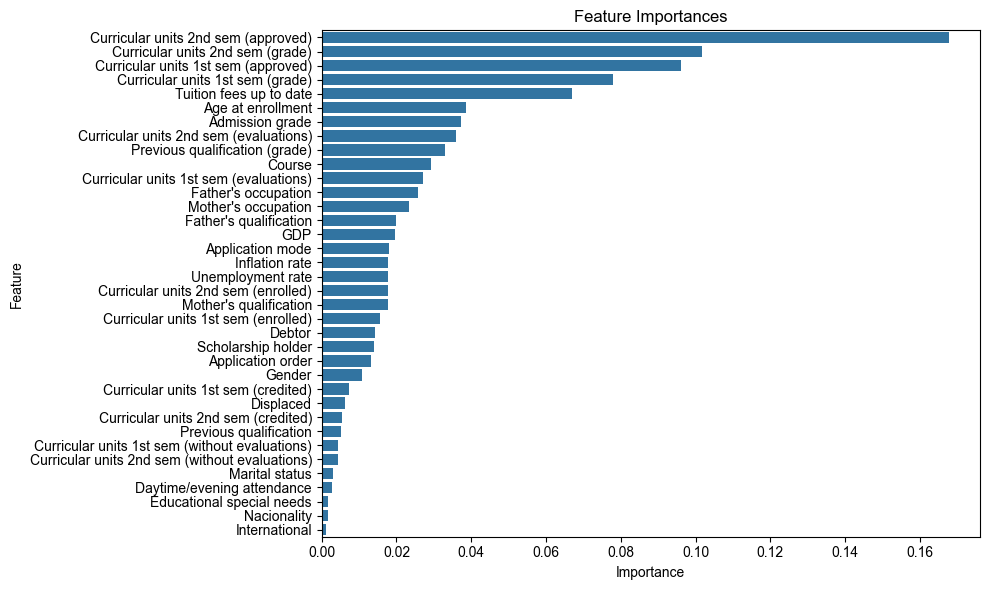

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'best_rf' is your fitted random forest model and 'data' is your DataFrame
feature_importances = best_rf.feature_importances_

# Drop the target variable from the DataFrame
data_corrected = data.drop(columns=['Target'])

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': data_corrected.columns,
    'Importance': feature_importances
})

# Check for special characters in the feature names and clean them
feature_importance_df['Feature'] = feature_importance_df['Feature'].str.replace(r'[\t\r\n]', '', regex=True)

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a suitable font
plt.rcParams['font.family'] = 'Arial'

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

# Add plot title and labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()



ROC AUC Score of Tuned Decision Tree Model: 0.98


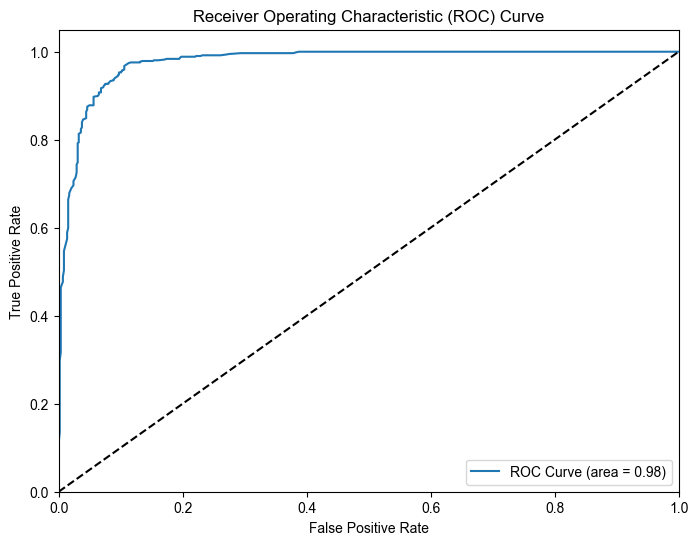

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test = y_test.astype(int)

# Get predicted probabilities for the positive class
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score of Tuned Decision Tree Model: {roc_auc:.2f}")

# Optional: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 10. Make Predictions

In [41]:
# Display the predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head(20))  # Display the first 20 predictions

      Actual Predicted
79         1         1
3043       1         1
4851       0         0
1168       0         1
3573       1         0
5876       0         0
3945       1         1
812        1         1
2615       0         0
2053       1         1
3198       0         0
5859       0         0
4909       0         0
3158       1         1
2119       1         0
4955       0         0
156        1         1
476        0         0
2775       1         1
681        1         1


# 11. Results / Solutions

## Educational institutions can significantly enhance student success and reduce dropout rates by leveraging predictive analytics. This approach involves using historical data to forecast future student performance, allowing for early identification of at-risk students and timely interventions. Here are several strategies and benefits associated with implementing predictive analytics in educational settings.

Benefits of Predictive Analytics
1. Early Identification of At-Risk Student
2. Tailored Interventions
3. Resource Optimization
4. Continuous Improvement through Data Monitorings

## 